# libraries

In [ ]:
import os
import pandas as pd
import numpy as np
from keras import backend as K

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense , Input,Lambda
from tensorflow.keras.layers import Conv2D, TimeDistributed, MaxPooling2D, Flatten, Dense,GlobalAveragePooling1D,GlobalAveragePooling2D
from tensorflow.keras.layers import Reshape
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau , EarlyStopping

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


# data preparation

In [ ]:
fullpath = '/kaggle/input/crimeucfdataset/'
os.listdir(fullpath)

['anomaly', 'Anomaly_Dataset']

In [ ]:
p = os.path.join(fullpath,'Anomaly_Dataset')

In [ ]:
p1 = os.path.join(p,'Anomaly_Videos')
new_path=[]
for i in os.listdir(p1):
    if i[-3:] =='txt':
        pass
    else:
        new_path.append(i)
        

In [ ]:
new_path

['Anomaly-Videos-Part-2', 'Anomaly-Videos-Part-1', 'Normal-Videos-Part-1']

In [ ]:
p_an1 = os.path.join(p1,new_path[0])
p_an2 = os.path.join(p1,new_path[1])
p_no = os.path.join(p1,new_path[2])

In [ ]:
p_an2

'/kaggle/input/crimeucfdataset/Anomaly_Dataset/Anomaly_Videos/Anomaly-Videos-Part-1'

In [ ]:
import os
import glob
import pandas as pd

# Set the directory paths and class names
dir_path_1 = p_an1
dir_path_2 = p_an2
class_names_1 = ["Burglary", "Explosion","Fighting"]
class_names_2 = ["Abuse", "Arrest", "Arson","Assault"]

# Initialize empty lists for the video paths and labels
video_paths = []
labels = []

# Iterate over the first directory and class names to retrieve the video paths and labels
for class_name in class_names_1:
    # Get the path to the class subdirectory
    class_dir_path = os.path.join(dir_path_1, class_name)
    
    # Get a list of file paths in the class subdirectory
    file_paths = glob.glob(os.path.join(class_dir_path, "*.mp4"))
    
    # Append the file paths and class label to the lists
    video_paths.extend(file_paths)
    labels.extend([class_name] * len(file_paths))

# Iterate over the second directory and class names to retrieve the video paths and labels
for class_name in class_names_2:
    # Get the path to the class subdirectory
    class_dir_path = os.path.join(dir_path_2, class_name)
    
    # Get a list of file paths in the class subdirectory
    file_paths = glob.glob(os.path.join(class_dir_path, "*.mp4"))
    
    # Append the file paths and class label to the lists
    video_paths.extend(file_paths)
    labels.extend([class_name] * len(file_paths))

# Create a dataframe with the video paths and labels
df = pd.DataFrame({"video_path": video_paths, "label": labels})

# Print the dataframe
print(df)

                                            video_path     label
0    /kaggle/input/crimeucfdataset/Anomaly_Dataset/...  Burglary
1    /kaggle/input/crimeucfdataset/Anomaly_Dataset/...  Burglary
2    /kaggle/input/crimeucfdataset/Anomaly_Dataset/...  Burglary
3    /kaggle/input/crimeucfdataset/Anomaly_Dataset/...  Burglary
4    /kaggle/input/crimeucfdataset/Anomaly_Dataset/...  Burglary
..                                                 ...       ...
395  /kaggle/input/crimeucfdataset/Anomaly_Dataset/...   Assault
396  /kaggle/input/crimeucfdataset/Anomaly_Dataset/...   Assault
397  /kaggle/input/crimeucfdataset/Anomaly_Dataset/...   Assault
398  /kaggle/input/crimeucfdataset/Anomaly_Dataset/...   Assault
399  /kaggle/input/crimeucfdataset/Anomaly_Dataset/...   Assault

[400 rows x 2 columns]


In [ ]:
video_paths = []
labels = []

# Get a list of file paths in the class subdirectory
file_paths = glob.glob(os.path.join(p_no, "*.mp4"))

# Append the file paths and class label to the lists
video_paths.extend(file_paths)
labels.extend(['Normal'] * len(file_paths))
# Create a new dataframe with the new video paths and labels
df_new = pd.DataFrame({"video_path": video_paths, "label": labels})

In [ ]:
All_Data =  pd.concat([df, df_new], ignore_index=True)
All_Data

,video_path,label
0,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Burglary
1,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Burglary
2,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Burglary
3,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Burglary
4,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Burglary
...,...,...
545,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Normal
546,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Normal
547,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Normal
548,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Normal


In [ ]:
df_shuffled = All_Data.sample(frac=1.0, random_state=42)
df_shuffled = df_shuffled.reset_index(drop=True)
df_shuffled

,video_path,label
0,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Fighting
1,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Burglary
2,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Normal
3,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Explosion
4,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Normal
...,...,...
545,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Burglary
546,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Explosion
547,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Arrest
548,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Normal


In [ ]:
label_map = {'Normal': 0, 'Abuse': 1, 'Arrest': 2, 'Arson': 3, 'Assault': 4, 'Burglary': 5, 'Explosion': 6, 'Fighting': 7}
df_shuffled['label'] = df_shuffled['label'].map(label_map)

In [ ]:
df_shuffled

,video_path,label
0,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,7
1,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,5
2,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,0
3,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,6
4,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,0
...,...,...
545,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,5
546,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,6
547,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,2
548,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,0


In [ ]:
# split data to train and val
from sklearn.model_selection import train_test_split

# Split the dataframe into training and testing sets
train_df, val_df = train_test_split(df_shuffled, test_size=0.3, random_state=42)


In [ ]:
train_df

,video_path,label
42,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,4
349,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,6
523,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,2
469,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,3
399,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,1
...,...,...
71,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,0
106,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,6
270,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,0
435,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,4


In [ ]:
val_df

,video_path,label
195,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,1
79,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,7
480,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,3
109,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,3
522,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,0
...,...,...
257,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,7
488,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,5
192,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,0
25,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,0


In [ ]:

# Split the data into training, validation, and test sets
X_train , y_train, X_val, y_val = train_df['video_path'].tolist() , train_df['label'].tolist(),val_df['video_path'].tolist() , val_df['label'].tolist()

# generator

In [ ]:
%%writefile yassm2.py
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

class VideoDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, video_paths, labels, batch_size=32, frame_size=(224, 224), num_channels=3, num_classes=2, shuffle=True, num_frames=16):
        self.video_paths = video_paths
        self.labels = labels
        self.batch_size = batch_size
        self.frame_size = frame_size
        self.num_channels = num_channels
        self.num_classes = num_classes
        self.shuffle = shuffle
        self.num_frames = num_frames
        self.indexes = np.arange(len(self.video_paths))
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.video_paths) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        video_paths_batch = [self.video_paths[k] for k in indexes]
        labels_batch = [self.labels[k] for k in indexes]
        X, y = self.__data_generation(video_paths_batch, labels_batch)
        return X, y

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __data_generation(self, video_paths_batch, labels_batch):
        X = np.zeros((self.batch_size, self.num_frames, *self.frame_size, self.num_channels))
        y = np.zeros((self.batch_size, self.num_classes))
        #print('labels_batch:', labels_batch)
        #print('num_classes:', self.num_classes)
        for i, video_path in enumerate(video_paths_batch):
            frames = self.get_frames(video_path)
      
            clip = np.concatenate(frames, axis=-1)  # concatenate RGB channels
          
            clip_shape = clip.shape
            clip = clip.transpose((1, 2, 3, 0))
            X[i,:,:,:,:] = clip
            #print(X)
            y[i,] = to_categorical(labels_batch[i], num_classes=self.num_classes)
        return X, y

    def get_frames(self, video_path):
        cap = cv2.VideoCapture(video_path)
        frames = []
        clips =[]
        mean = [0.43216, 0.394666, 0.37645]
        std = [0.22803, 0.22145, 0.216989]
        if not cap.isOpened():
            cap.open(video_path)
        ret = True
        stop_reading = False
        while ret and not stop_reading:
            # Capture frame-by-frame
            ret, frame = cap.read()
            if ret==False:
                break;
            frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
            frame = (frame - mean) / std
            frames.append(frame)
            if len(frames) >= self.num_frames:
                stop_reading = True
        cap.release()
        step = len(frames)//self.num_frames
        #print(step)
        if step==0:
            step=1
        avg_frames = frames[::step]
        avg_frames = avg_frames[:self.num_frames]
        avg_resized_frames = []
        r_frames = []
        g_frames = []
        b_frames = []
        for af in avg_frames:
            rsz_f = cv2.resize(af, (self.frame_size[0], self.frame_size[1]))
            r_frames.append(rsz_f[:,:,0])
            g_frames.append(rsz_f[:,:,1])
            b_frames.append(rsz_f[:,:,2])

        avg_resized_frames.append(r_frames)
        avg_resized_frames.append(g_frames)
        avg_resized_frames.append(b_frames)

        clip=np.asarray(avg_resized_frames)

        clips.append(clip)
        return clips

Writing yassm2.py


In [ ]:
from yassm2 import VideoDataGenerator


In [ ]:
# def __init__(self, video_paths, labels, batch_size, frame_size=(224, 224), num_channels=3, num_classes=2, shuffle=True, num_frames=16):

train_generator = VideoDataGenerator(X_train, y_train, batch_size=5, frame_size=(224, 224), num_channels=3, num_classes=8, shuffle=False, num_frames=16)
val_generator = VideoDataGenerator(X_val, y_val, batch_size=5, frame_size=(224, 224), num_channels=3, num_classes=8, shuffle=False, num_frames=16)

In [ ]:
data,labels = val_generator.__getitem__(0)


1
1
1
1
1


In [ ]:
labels,data = train_generator.__getitem__(0)
data.shape

1
1
1
1
1


(5, 8)

In [ ]:
labels.shape

(5, 16, 224, 224, 3)

In [ ]:
X_batch, y_batch = train_generator[0]


1
1
1
1
1


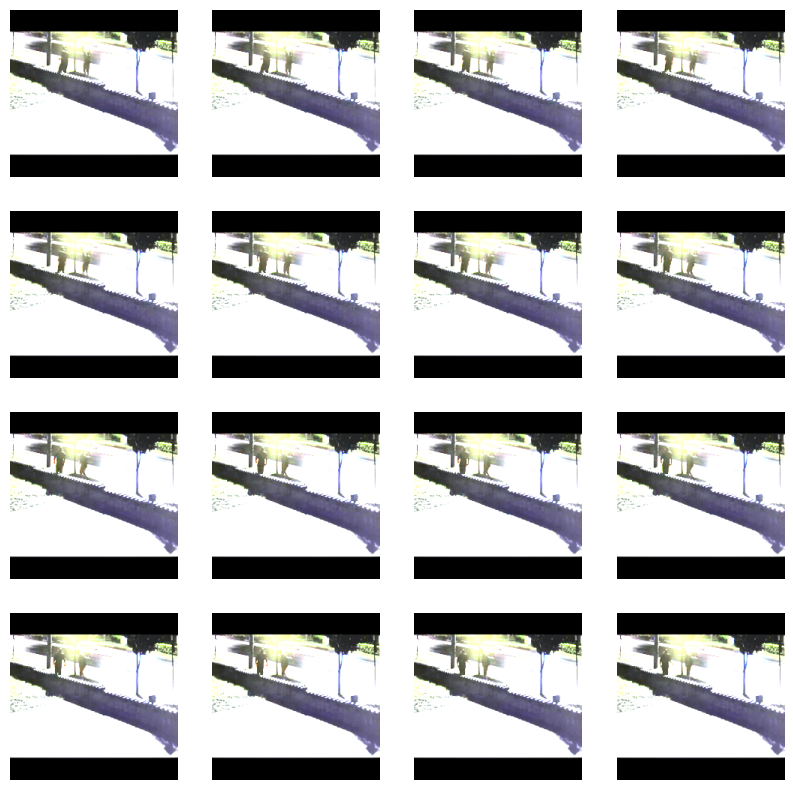

In [ ]:
import matplotlib.pyplot as plt
# print the all 16 frames for first video
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))

t = X_batch[0]
for i, ax in enumerate(axes.flat):
    # Get the i-th frame tensor and convert it to a numpy array
    frame_tensor = t[i, :, :, :] /255 # shape = (3,112,112)  # loop on frame?? 16
    #print(frame_tensor.shape)
    # Plot the frame using imshow
    ax.imshow(frame_tensor)  #  shape transpose
    ax.set_axis_off()

plt.show()

In [ ]:
X_batch[0].shape

(30, 224, 224, 3)

In [ ]:
y_batch.shape

(5, 8)

In [ ]:
y_batch[0]

array([0., 0., 0., 0., 1., 0., 0., 0.])

In [ ]:
train_df.iloc[0]['video_path']

'/kaggle/input/crimeucfdataset/Anomaly_Dataset/Anomaly_Videos/Anomaly-Videos-Part-1/Assault/Assault029_x264.mp4'

In [ ]:
# let's apply above process on all videos

import cv2
X_train=[]
frames = []
i =0
mean = [0.43216, 0.394666, 0.37645]
std = [0.22803, 0.22145, 0.216989]
for vid in train_df.iloc[0]['video_path']:
      cap = cv2.VideoCapture(vid)
      frames = []
      if not cap.isOpened():
          cap.open(train_df.iloc[0]['video_path'])
      ret = True
      while(True and ret):
        # Capture frame-by-frame
        ret, frame = cap.read()
        if ret==False:
          break;
        frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        frame = (frame - mean) / std
        frames.append(frame)
      cap.release()
      step = len(frames)//16 # take 16 frames only from each video
      if step==0:
        step=1
      #print(step)
      avg_frames = frames[::step]
      avg_frames = avg_frames[:16]
      #print(len(avg_frames))
      avg_resized_frames = []
      r_frames = []
      g_frames = []
      b_frames = []
      for af in avg_frames:
        #print(af.shape)
        rsz_f = cv2.resize(af, (112, 112)) # resize frames
        #print(rsz_f.shape)
        r_frames.append(rsz_f[:,:,0])
        g_frames.append(rsz_f[:,:,1])
        b_frames.append(rsz_f[:,:,2])

      avg_resized_frames.append(r_frames)
      avg_resized_frames.append(g_frames)
      avg_resized_frames.append(b_frames)

      clip=np.asarray(avg_resized_frames)
      #print(clip.shape)
      X_train.append(clip)


[ERROR:0] global /tmp/pip-req-build-4x5kub8r/opencv/modules/videoio/src/cap.cpp (164) open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.5.4) /tmp/pip-req-build-4x5kub8r/opencv/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): / in function 'icvExtractPattern'


[ERROR:0] global /tmp/pip-req-build-4x5kub8r/opencv/modules/videoio/src/cap.cpp (164) open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.5.4) /tmp/pip-req-build-4x5kub8r/opencv/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): k in function 'icvExtractPattern'


[ERROR:0] global /tmp/pip-req-build-4x5kub8r/opencv/modules/videoio/src/cap.cpp (164) open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.5.4) /tmp/pip-req-build-4x5kub8r/opencv/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name

In [ ]:
len(X_train)

110

In [ ]:
len(frames)

609

In [ ]:
df_shuffled['video_path'].to_list()

['/kaggle/input/crimeucfdataset/Anomaly_Dataset/Anomaly_Videos/Anomaly-Videos-Part-2/Fighting/Fighting047_x264.mp4',
 '/kaggle/input/crimeucfdataset/Anomaly_Dataset/Anomaly_Videos/Anomaly-Videos-Part-2/Burglary/Burglary087_x264.mp4',
 '/kaggle/input/crimeucfdataset/Anomaly_Dataset/Anomaly_Videos/Normal-Videos-Part-1/Normal_Videos_621_x264.mp4',
 '/kaggle/input/crimeucfdataset/Anomaly_Dataset/Anomaly_Videos/Anomaly-Videos-Part-2/Explosion/Explosion024_x264.mp4',
 '/kaggle/input/crimeucfdataset/Anomaly_Dataset/Anomaly_Videos/Normal-Videos-Part-1/Normal_Videos_576_x264.mp4',
 '/kaggle/input/crimeucfdataset/Anomaly_Dataset/Anomaly_Videos/Normal-Videos-Part-1/Normal_Videos_904_x264.mp4',
 '/kaggle/input/crimeucfdataset/Anomaly_Dataset/Anomaly_Videos/Anomaly-Videos-Part-2/Burglary/Burglary096_x264.mp4',
 '/kaggle/input/crimeucfdataset/Anomaly_Dataset/Anomaly_Videos/Anomaly-Videos-Part-1/Assault/Assault009_x264.mp4',
 '/kaggle/input/crimeucfdataset/Anomaly_Dataset/Anomaly_Videos/Anomaly-Video

In [ ]:
import cv2
import pandas as pd

# List of video paths
video_paths = df_shuffled['video_path'].to_list()

# Create an empty list to store the number of frames
num_frames_list = []

# Loop through the video paths
for path in video_paths:
    # Open the video file
    cap = cv2.VideoCapture(path)
    
    # Get the total number of frames
    num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Add the number of frames to the list
    num_frames_list.append(num_frames)
    
    # Release the video file
    cap.release()

# Calculate the statistics of the number of frames
mean_frames = np.mean(num_frames_list)
std_frames = np.std(num_frames_list)
min_frames = np.min(num_frames_list)
max_frames = np.max(num_frames_list)

# Print the statistics
print('Mean number of frames:', mean_frames)
print('Standard deviation of number of frames:', std_frames)
print('Minimum number of frames:', min_frames)
print('Maximum number of frames:', max_frames)

Mean number of frames: 4589.365454545455
Standard deviation of number of frames: 11365.62038762222
Minimum number of frames: 137
Maximum number of frames: 141900


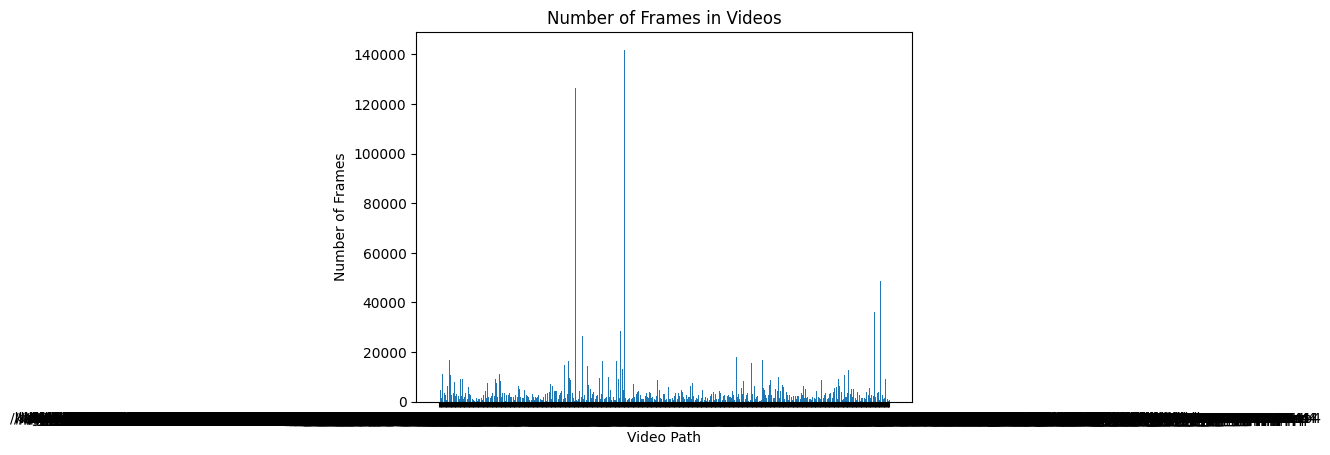

In [ ]:
# Create a bar chart of the number of frames
plt.bar(range(len(num_frames_list)), num_frames_list)
plt.xticks(range(len(num_frames_list)), video_paths)
plt.xlabel('Video Path')
plt.ylabel('Number of Frames')
plt.title('Number of Frames in Videos')
plt.show()

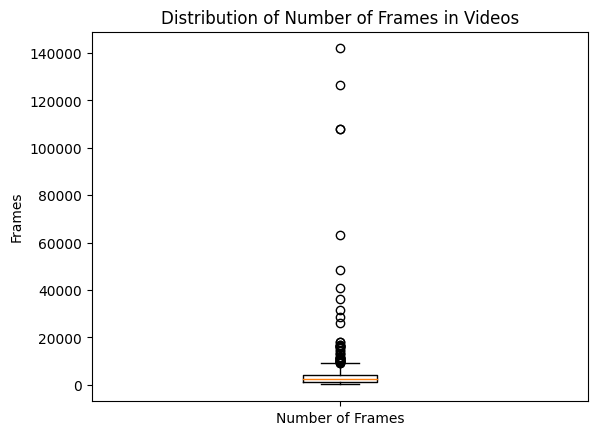

In [ ]:
# Create a box plot of the number of frames
plt.boxplot(num_frames_list)
plt.xticks([1], ['Number of Frames'])
plt.ylabel('Frames')
plt.title('Distribution of Number of Frames in Videos')
plt.show()

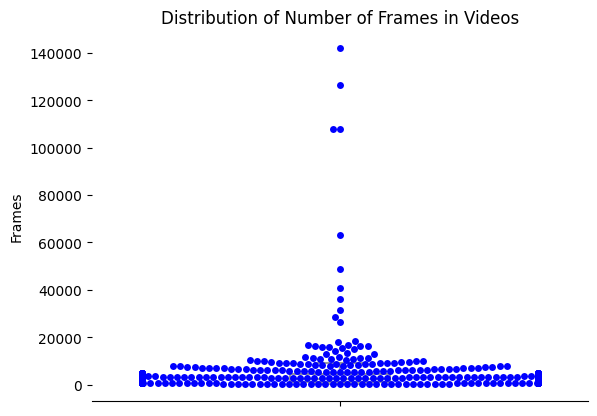

In [ ]:
import seaborn as sns
# Create a swarm plot of the number of frames
sns.swarmplot(y=num_frames_list, color='blue')
sns.boxplot(y=num_frames_list, color='white', width=0.2, fliersize=0)
sns.despine(left=True)
plt.ylabel('Frames')
plt.title('Distribution of Number of Frames in Videos')
plt.show()

In [ ]:
train_df.iloc[0]['video_path']

'/kaggle/input/crimeucfdataset/Anomaly_Dataset/Anomaly_Videos/Anomaly-Videos-Part-1/Assault/Assault029_x264.mp4'

In [ ]:
# calc mean and std from samples of videos
import cv2
import numpy as np
import pandas as pd

# Define the number of frames to sample
num_frames = 50

# Define the mean and standard deviation arrays
mean = np.zeros(3)
std = np.zeros(3)
epsilon = 1e-6

video_paths = df_shuffled['video_path'].tolist()

# Loop through the video paths
for video_path in video_paths[:100]:
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Get the total number of frames in the video
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Sample frames randomly
    frame_indices = np.random.choice(total_frames, size=num_frames, replace=False)

    # Loop through the sampled frames
    for i, frame_index in enumerate(frame_indices):
        # Seek to the frame index using cv2.CAP_PROP_POS_FRAMES
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)

        # Read and decode the frame
        ret, frame = cap.read()
        if ret: 
            frame = frame.astype(np.float32) / 255.0
            # Normalize the pixel values using the mean and standard deviation
            frame = (frame - mean )/ (std+epsilon)

            # Update the mean and standard deviation arrays
            if i == 0:
                mean = np.mean(frame, axis=(0, 1))
                std = np.std(frame, axis=(0, 1))
            else:
                mean = (i * mean + np.mean(frame, axis=(0, 1))) / (i + 1)
                std = (i * std + np.std(frame, axis=(0, 1))) / (i + 1)

    # Release the video file
    cap.release()

# Print the calculated mean and standard deviation arrays
print('Mean pixel values:', mean)
print('Standard deviation of pixel values:', std)

Mean pixel values: [0.22146088 0.20873131 0.2019145 ]
Standard deviation of pixel values: [0.52410259 0.52200656 0.52084839]


In [ ]:
mean = [0.22146088 , 0.20873131  ,0.2019145 ]
std =  [0.52410259  ,0.52200656  ,0.52084839]

In [ ]:
#### try take 100 frames from video based on its length
import cv2
#mean = [0.43216, 0.394666, 0.37645]
#std = [0.22803, 0.22145, 0.216989]

# Open the video file
cap = cv2.VideoCapture(train_df.iloc[100]['video_path'])
if not cap.isOpened():
    print("k")
    cap.open(train_df.iloc[100]['video_path'])
# Get the total number of frames
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print("total_frames:",total_frames)
# Calculate the time interval between frames
time_interval = total_frames / 3 / 100
print("time_interval:",time_interval)

# Sample frames at a fixed time interval
frames = []
for i in range(100):
    # Calculate the frame index based on the time interval
    frame_index = int(i * time_interval)
    

    # Seek to the frame index using cv2.CAP_PROP_POS_FRAMES
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
    ret = True
    if (True and ret):
    # Read and decode the frame
        ret, frame = cap.read()
        #print(frame)

    # Append the frame to the list of frames
        if ret==False:
            break
        frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        frame = (frame - mean) / std
        frames.append(frame)

# Release the video file
cap.release()

total_frames: 2498
time_interval: 8.326666666666666


In [ ]:
frames[0][4][0]


array([-0.42255254, -0.39986338, -0.38766463])

In [ ]:
len(frames)

100

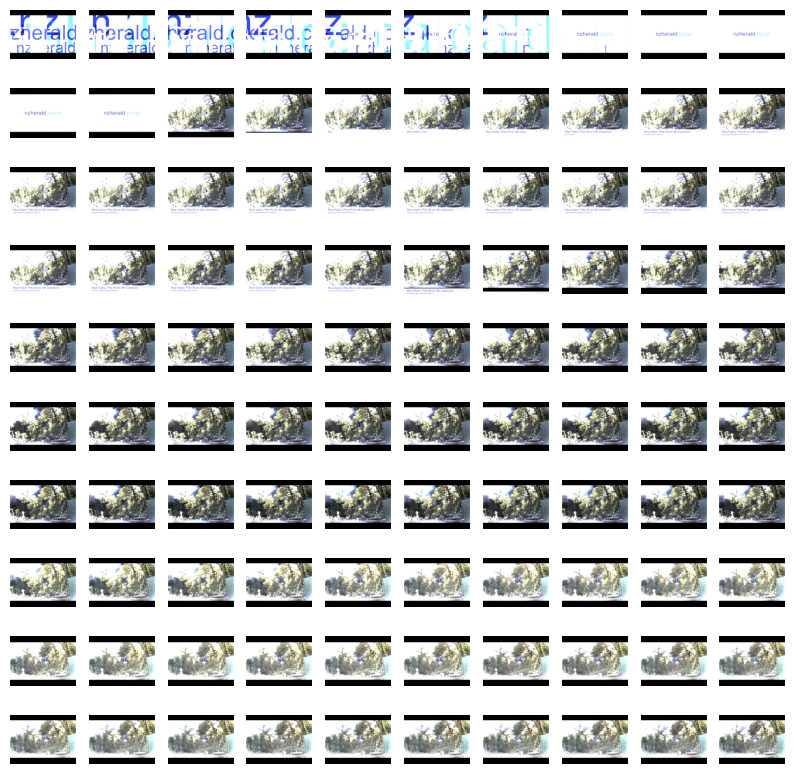

In [ ]:
# Plot the frames using matplotlib
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(10,10))
for i, ax in enumerate(axes.flatten()):
    if i < len(frames):
        ax.imshow(frames[i]/255)
    ax.axis('off')
plt.show()

# modify generator

In [ ]:
%%writefile mod_gen.py
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

class VideoDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, video_paths, labels, batch_size=32, frame_size=(224, 224), num_channels=3, num_classes=2, shuffle=True, num_frames=16):
        self.video_paths = video_paths
        self.labels = labels
        self.batch_size = batch_size
        self.frame_size = frame_size
        self.num_channels = num_channels
        self.num_classes = num_classes
        self.shuffle = shuffle
        self.num_frames = num_frames
        self.indexes = np.arange(len(self.video_paths))
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.video_paths) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        video_paths_batch = [self.video_paths[k] for k in indexes]
        labels_batch = [self.labels[k] for k in indexes]
        X, y = self.__data_generation(video_paths_batch, labels_batch)
        return X, y

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __data_generation(self, video_paths_batch, labels_batch):
        X = np.zeros((self.batch_size, self.num_frames, *self.frame_size, self.num_channels))
        y = np.zeros((self.batch_size, self.num_classes))
        #print('labels_batch:', labels_batch)
        #print('num_classes:', self.num_classes)
        for i, video_path in enumerate(video_paths_batch):
            frames = self.get_frames(video_path)
      
            clip = np.concatenate(frames, axis=-1)  # concatenate RGB channels
          
            clip_shape = clip.shape
            clip = clip.transpose((1, 2, 3, 0))
            X[i,:,:,:,:] = clip
            #print(X)
            y[i,] = to_categorical(labels_batch[i], num_classes=self.num_classes)
        return X, y

    def get_frames(self, video_path):
        mean = [0.22146088 , 0.20873131  ,0.2019145 ]
        std =  [0.52410259  ,0.52200656  ,0.52084839]
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            cap.open(video_path)
          # Get the total number of frames
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
      #print("total_frames:",total_frames)
      # Calculate the time interval between frames
        time_interval = total_frames / 3 / self.num_frames
      #print("time_interval:",time_interval)
        clips=[]
       # Sample frames at a fixed time interval
        frames = []
        for i in range(self.num_frames):
        # Calculate the frame index based on the time interval
            frame_index = int(i * time_interval)

        # Seek to the frame index using cv2.CAP_PROP_POS_FRAMES
            cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
            ret = True
            if (True and ret):
              # Read and decode the frame
                ret, frame = cap.read()

              # Append the frame to the list of frames
                if ret==False:
                        break

                frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
                frame = (frame - mean) / std
                frames.append(frame)
        avg_resized_frames = []
        r_frames = []
        g_frames = []
        b_frames = []
        for af in frames:
            rsz_f = cv2.resize(af, (self.frame_size[0], self.frame_size[1]))
            r_frames.append(rsz_f[:,:,0])
            g_frames.append(rsz_f[:,:,1])
            b_frames.append(rsz_f[:,:,2])

        avg_resized_frames.append(r_frames)
        avg_resized_frames.append(g_frames)
        avg_resized_frames.append(b_frames)

        clip=np.asarray(avg_resized_frames)

        clips.append(clip)
        return clips

Overwriting mod_gen.py


In [ ]:
from mod_gen import VideoDataGenerator

In [ ]:

train_generator = VideoDataGenerator(X_train, y_train, batch_size=1, frame_size=(224, 224), num_channels=3, num_classes=8, shuffle=False, num_frames=100)
val_generator = VideoDataGenerator(X_val, y_val, batch_size=1, frame_size=(224, 224), num_channels=3, num_classes=8, shuffle=False, num_frames=100)


In [ ]:
data,labels = val_generator.__getitem__(0)
labels,data = train_generator.__getitem__(0)
data.shape


(1, 8)

In [ ]:
X_batch, y_batch = train_generator[0]


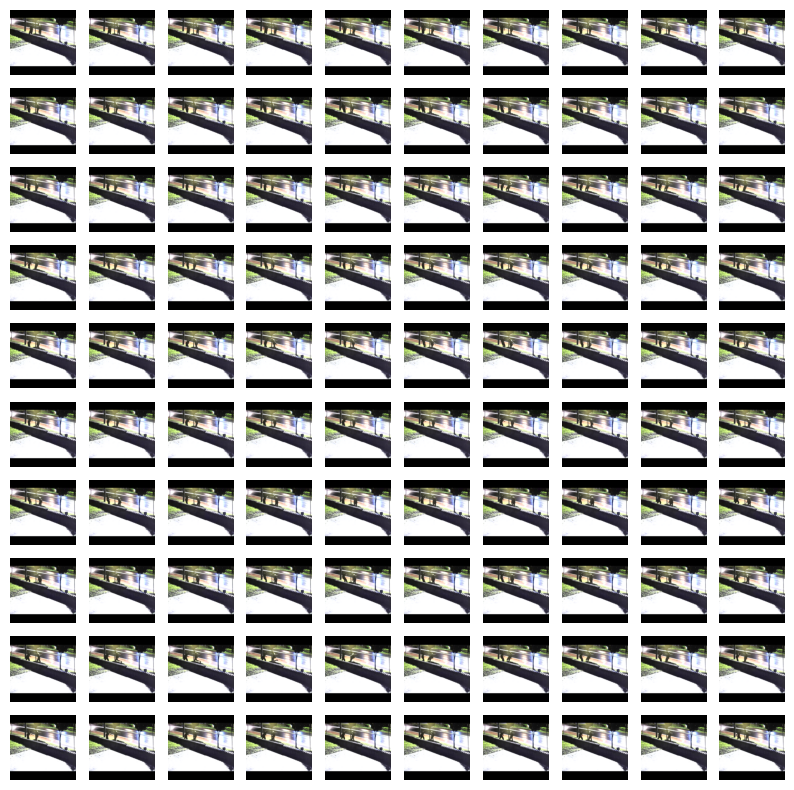

In [ ]:
import matplotlib.pyplot as plt
# print the all 16 frames for first video
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(10, 10))

t = X_batch[0]
for i, ax in enumerate(axes.flat):
    # Get the i-th frame tensor and convert it to a numpy array
    frame_tensor = t[i, :, :, :] /255 # shape = (3,112,112)  # loop on frame?? 16
    #print(frame_tensor.shape)
    # Plot the frame using imshow
    ax.imshow(frame_tensor)  #  shape transpose
    ax.set_axis_off()

plt.show()


In [ ]:
print(X_batch.shape)
print(y_batch.shape)

(1, 100, 224, 224, 3)
(1, 8)
